In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# !cd /content/drive/'path'

In [63]:
!pip install lxml
!pip install wordcloud
!pip install imblearn
!pip install scikit-learn

In [64]:
!pip install faster-whisper
# !pip install gradio
# !pip install googletrans==4.0.0-rc1
# !pip install --upgrade tensorflow

In [65]:
from faster_whisper import WhisperModel

stt_model = WhisperModel("large-v3")

In [66]:
# stt를 실행하는 함수
def stt_func(filepath):

  transcripts = []

  segments, info = stt_model.transcribe(filepath, language="ko")
  tmp = ""
  for segment in segments:
#    tmp = tmp + segment.text
    transcripts.append(segment.text)

  return transcripts

In [67]:
# record = []
# def trans_audio(filepath):
#     segments, info = stt_model.transcribe(filepath, language="en", task = "transcribe")
#     tmp = ""
#     for segment in segments:
#         tmp = tmp + segment.text
#         record.append(tmp)
#     return tmp

# import gradio as gr
# import time

# def recording():
#   output_1 = gr.Textbox(label="Speech to Text")

#   gr.Interface(
#     title = 'OpenAI Whisper ASR Gradio Web UI',
#     fn = trans_audio,
#     inputs=[gr.Audio(type="filepath")],
#     outputs = [output_1],
#     live=True).launch()

In [68]:
!pip install googletrans==4.0.0-rc1


In [69]:
from googletrans import Translator
# def translate_file(input_file_path, output_file_path, src_lang='ko', dest_lang='en'):
#     # 번역기 초기화
#     translator = Translator()

#     # 입력 파일 읽기
#     with open(input_file_path, 'r', encoding='utf-8') as file:
#         korean_text = file.read()

#     # 한국어 텍스트를 영어로 번역
#     translation = translator.translate(korean_text, src=src_lang, dest=dest_lang)
#     english_text = translation.text

#     # 번역된 텍스트를 출력 파일로 저장
#     with open(output_file_path, 'w', encoding='utf-8') as file:
#         file.write(english_text)

In [70]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# CSV 파일 불러오기
# data1 = pd.read_csv('/content/drive/MyDrive/MBTI 500.csv')
# data2 = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')

# # MBTI_500과 mbti 데이터 합치기
# data = pd.concat([data1, data2], ignore_index=True)

# # 기존에 T 또는 F를 포함하는 성격 유형에 대해 해당 문자로 대체
# data['type'] = data['type'].replace({
#     'INTJ': 'T', 'INTP': 'T', 'ENTJ': 'T', 'ENTP': 'T',
#     'ISTJ': 'T', 'ISTP': 'T', 'ESTJ': 'T', 'ESTP': 'T',
#     'INFJ': 'F', 'INFP': 'F', 'ENFJ': 'F', 'ENFP': 'F',
#     'ISFJ': 'F', 'ISFP': 'F', 'ESFJ': 'F', 'ESFP': 'F'
# })

import pandas as pd

# Google Drive에 저장된 CSV 파일 경로
file_path = '/content/drive/MyDrive/adasyn.csv'
# CSV 파일 로드
data = pd.read_csv(file_path, index_col=False)

In [71]:
# 전처리 함수에서 사용할 contractions
contractions = {
    "'cause": 'because', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have',
    "I'm": 'I am', "I've": 'I have', "ain't": 'is not', "aren't": 'are not', "can't": 'cannot', "could've": 'could have',
    "couldn't": 'could not', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not',
    "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'll": 'he will', "he's": 'he is', "here's": 'here is',
    "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "i'd": 'i would', "i'd've": 'i would have',
    "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would',
    "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam',
    "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have',
    "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock',
    "oughtn't": 'ought not', "oughtn't've": 'ought not have', "sha'n't": 'shall not', "shan't": 'shall not', "shan't've": 'shall not have',
    "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is',
    "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so's": 'so as', "so've": 'so have',
    "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there would', "there'd've": 'there would have',
    "there's": 'there is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have',
    "they're": 'they are', "they've": 'they have', "this's": 'this is', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would',
    "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not',
    "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have',
    "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will',
    "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have',
    "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have',
    "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have',
    "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have'
}

In [72]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import re
from bs4 import BeautifulSoup
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence)   # Links 제거
    sentence = sentence.lower()                               # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text           # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence)             # 괄호로 닫힌 문자열  제거 ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence)                       # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence)                    # 소유격 제거. ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence)             # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence)               # m이 3개 이상이면 2개로 변경. ex) ummmmmmm  -> umm

    pers_types = ['infp' ,'infj', 'intp', 'intj', 'istp', 'isfp', 'isfj','istp',
                  'entp', 'enfp', 'entj', 'enfj', 'estp', 'esfp' ,'esfj' ,'estj']
    for types in pers_types:
      sentence = sentence.replace(types, '')

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

# # 데이터 프레임의 'posts' 컬럼에 전처리 적용
# clean_posts = []
# for s in data['posts']:
#     clean_posts.append(preprocess_sentence(s))

# # 전처리된 결과 확인
# print(clean_posts[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
import joblib


joblib_file = "/content/drive/MyDrive/calibrated_svc.pkl"
svc_clf = joblib.load(joblib_file)

In [82]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 데이터 로드 및 분할
X = data['posts']
y = data['type']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_pre = svc_clf.predict(X_test)

classfication_report = classification_report(y_test, svc_pre, output_dict=True)
print(classfication_report)

{'F': {'precision': 0.9271440466278101, 'recall': 0.9306310071040534, 'f1-score': 0.9288842544316996, 'support': 16751}, 'T': {'precision': 0.9195625086529143, 'recall': 0.9155696464263561, 'f1-score': 0.9175617337247453, 'support': 14509}, 'accuracy': 0.9236404350607805, 'macro avg': {'precision': 0.9233532776403622, 'recall': 0.9231003267652047, 'f1-score': 0.9232229940782224, 'support': 31260}, 'weighted avg': {'precision': 0.9236251555696603, 'recall': 0.9236404350607805, 'f1-score': 0.9236290256109319, 'support': 31260}}


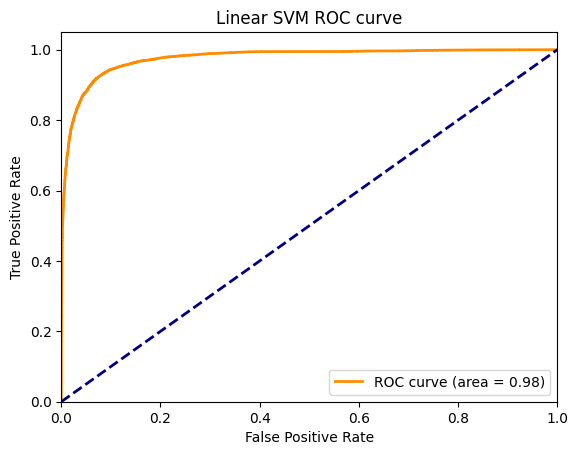

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
# 예측 확률
y_prob = svc_clf.predict_proba(X_test)[:, 1]

y_test_binary = np.where(y_test == 'T', 1, 0)

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVM ROC curve')
plt.legend(loc="lower right")
plt.show()

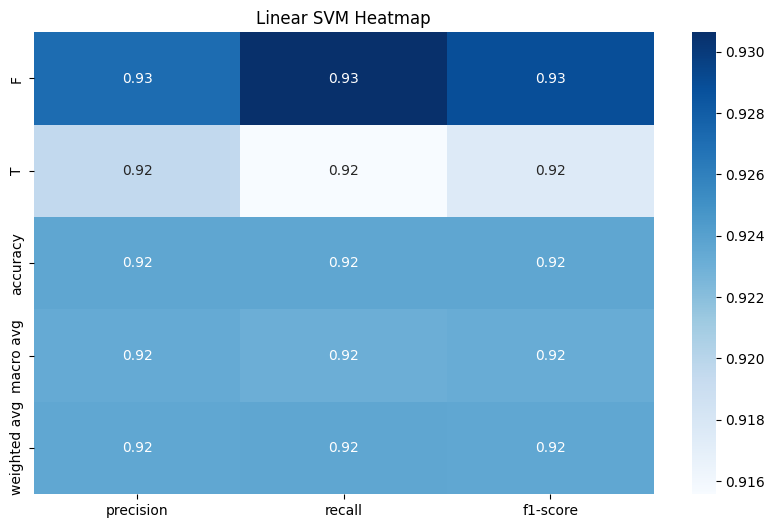

In [84]:
import seaborn as sns

# 보고서를 데이터프레임으로 변환
df_report = pd.DataFrame(classfication_report).transpose()

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.drop('support', axis=1), annot=True, cmap='Blues')
plt.title('Linear SVM Heatmap')
plt.show()

In [111]:
from tensorflow.keras.models import load_model

lstm = load_model("/content/drive/MyDrive/lstm_model.h5")
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 bidirectional (Bidirection  (None, 100, 64)           24832     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                        

In [86]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 텍스트 데이터와 라벨 추출
texts = data['posts'].values
labels = data['type'].values

# 텍스트 토큰화
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


# 패딩 적용
maxlen = 100
data1 = pad_sequences(sequences, maxlen=maxlen)

# 라벨 인코딩 (T -> 0, F -> 1)
label_dict = {'T': 0, 'F': 1}
labels = np.array([label_dict[label] for label in labels])

# 학습 및 테스트 데이터 분리
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(data1, labels, test_size=0.2, random_state=42)

In [128]:
X_train_seq1, X_val_seq, y_train_seq1, y_val_seq = train_test_split(X_train_seq, y_train_seq, test_size=0.2, random_state=42)

history = lstm.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=5,
    batch_size=32
)

Epoch 1/5
3908/3908 [==============================] - 74s 19ms/step - loss: 0.0324 - accuracy: 0.9886 - val_loss: 0.8563 - val_accuracy: 0.8450
Epoch 2/5
3908/3908 [==============================] - 74s 19ms/step - loss: 0.0312 - accuracy: 0.9892 - val_loss: 0.8715 - val_accuracy: 0.8479
Epoch 3/5
3908/3908 [==============================] - 74s 19ms/step - loss: 0.0299 - accuracy: 0.9897 - val_loss: 0.8310 - val_accuracy: 0.8561
Epoch 4/5
3908/3908 [==============================] - 72s 19ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.8698 - val_accuracy: 0.8472
Epoch 5/5
3908/3908 [==============================] - 73s 19ms/step - loss: 0.0291 - accuracy: 0.9899 - val_loss: 0.8761 - val_accuracy: 0.8496


In [104]:
lstm.evaluate(X_test_seq, y_test_seq)

977/977 [==============================] - 8s 8ms/step - loss: 0.7291 - accuracy: 0.8551


[0.7290991544723511, 0.8550543785095215]

In [ ]:
lstm_pre = lstm.predict(X_test_seq)
preds = (lstm_pre > 0.5).astype(int)

classfication_report = classification_report(y_test_seq, preds, output_dict=True)
print(classfication_report)

977/977 [==============================] - 8s 7ms/step
{'0': {'precision': 0.9386247006500171, 'recall': 0.9454821145495899, 'f1-score': 0.9420409284438951, 'support': 14509}, '1': {'precision': 0.9524782216881946, 'recall': 0.9464509581517522, 'f1-score': 0.9494550245538388, 'support': 16751}, 'accuracy': 0.946001279590531, 'macro avg': {'precision': 0.9455514611691058, 'recall': 0.9459665363506711, 'f1-score': 0.945747976498867, 'support': 31260}, 'weighted avg': {'precision': 0.9460482557015369, 'recall': 0.946001279590531, 'f1-score': 0.9460138498750424, 'support': 31260}}


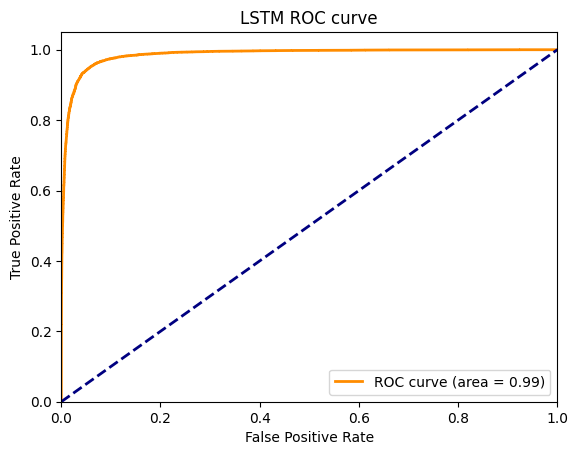

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_seq, lstm_pre.ravel())  # Extract probabilities from the single column
roc_auc = auc(fpr, tpr)

# ROC Curve 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC curve')
plt.legend(loc="lower right")
plt.show()


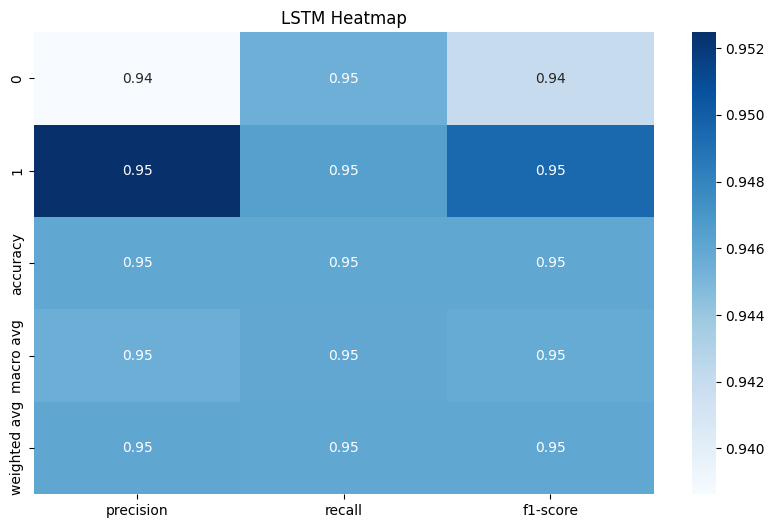

In [ ]:
import seaborn as sns

# 보고서를 데이터프레임으로 변환
df_report = pd.DataFrame(classfication_report).transpose()

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.drop('support', axis=1), annot=True, cmap='Blues')
plt.title('LSTM Heatmap')
plt.show()

In [ ]:
# 새로운 문장에 대한 예측 함수
def predict_mbti_type(new_sentence):
    prediction_proba = svc_clf.predict_proba([new_sentence])
    prediction = svc_clf.predict([new_sentence])
    return prediction_proba, prediction

# 새로운 문장 예측 예시
k = "I love programming and solving complex problems."
# k = preprocess_sentence(k)
predicted_type = predict_mbti_type(k)
print(f'The predicted MBTI type for the new sentence is: {predicted_type}')

The predicted MBTI type for the new sentence is: (array([[0.19958042, 0.80041958]]), array(['T'], dtype=object))


In [ ]:
# 예측 함수
def predict_mbti(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)
    prediction = lstm.predict(padded_sequence)
    return prediction
    # print(f'predic: {prediction}')
    # return 'T' if prediction < 0.5 else 'F'

# 예측 예시
sample_text = "I'm so sad"
predicted_type = predict_mbti(sample_text)
print(f'Predicted MBTI type: {predicted_type}')

1/1 [==============================] - 0s 42ms/step
Predicted MBTI type: [[0.9659913]]


In [119]:
# from sklearn.utils.extmath import softmax

# record = []
# record.append('내가 오늘은 기분이 좋아')
# record.append('한국의 전통주은 쌀로 만들어집니다')
# record.append('내일 만나서 얘기하자')
# record.append('그랬구나, 많이 속상했구나')
# record.append('얼어붙은 한강 위로 고양이가 걸어다닙니다')
# record.append('배열에 상태공간을 추가해서 탐색할 수 있습니다')
# record.append('나 지금 너무 힘들다')
# record.append('기계학습이라는 과목은 평판이 나쁘다')
# record.append('맞아 나도 기계학습이라는 과목은 너무 싫어')
# record.append('중앙인증서버 공부나 하자')
# record.append('저 자동차는 검은색이네')
# record.append('마음이 너무 아파')


# for i in record:
#   print((i))
#   k = Translator().translate(i, src='ko', dest='en').text
#   print(k)

#   k = preprocess_sentence(k)
#   print(k)

#   predict = predict_mbti_type(k)
#   print(f"predict_svm: {predict[0][0][0]}")
#   print(f"svm mbti: {predict[1]}")

#   predict2 = predict_mbti(k)
#   print(f"predict_lstm: {predict2}")
#   predicted_type = 'T' if predict2 < 0.5 else 'F'
#   print(f'lstm mbti: {predicted_type}')

#   res = (predict2*0.3 + predict[0][0][0]*0.7)
#   predicted_type = 'T' if res < 0.5 else 'F'
#   print(f'res: {res}')
#   print(f'res mbti: {predicted_type}')

#   print()



In [ ]:
# # 대화 말 리스트
# conversation = ["새로운 프로젝트에 대해 어떤 방향으로 나아갈지 고민 중이야. 일단 현재 상황을 분석해 보고 싶어.",
#                 "네, 그런데 사람들이 어떤 아이디어를 가지고 있는지도 중요할 것 같아. 함께 의논해보는 게 좋을 것 같아.",
#                 "맞아, 현재 상황을 고려하면서 모든 가능성을 탐색하는 것이 중요할 거야. 그래서 사실과 데이터에 기반하여 결정을 내리는 게 좋을 것 같아.",
#                 "네, 그런데 사람들의 감정도 중요하다고 생각해. 모든 가능성을 고려할 때 다른 사람들의 의견도 듣는 게 좋을 것 같아.",
#                 "맞아, 타인의 의견을 듣는 것도 중요하지. 하지만 의사 결정에 있어서는 객관적인 데이터를 바탕으로 하는 게 좋을 거야.",
#                 "그렇지만 때로는 감정에 기반한 결정도 필요할 때가 있어. 그렇지 않으면 사람들과의 관계가 손상될 수도 있잖아.",
#                 "그렇긴 해도, 객관적인 판단이 더욱 중요하다고 생각해. 감정에 휘둘리지 않고 현실적인 해결책을 찾는 게 중요한 거야."]

# # 각 대화에 대한 MBTI 유형 (T 또는 F)
# mbti_types = ['T', 'F', 'T', 'F', 'T', 'F', 'T']

# # 각 유형에 대한 정답 배열 생성
# ans = [0 if mbti == 'T' else 1 for mbti in mbti_types]


# cnt = 0
# correct = 0
# wrong = 0
# x = 0

# for i in conversation:
#   print(cnt)
#   print((i))
#   k = Translator().translate(i, src='ko', dest='en').text
#   print(k)

#   k = preprocess_sentence(k)
#   print(k)

#   predict = predict_mbti_type(k)
#   print(f"predict_svm: {predict[0][0][0]}")
#   print(f"svm mbti: {predict[1]}")

#   predict2 = predict_mbti(k)
#   print(f"predict_lstm: {predict2}")
#   predicted_type = 'T' if predict2 < 0.5 else 'F'
#   print(f'lstm mbti: {predicted_type}')

#   res = (predict2*0.339 + predict[0][0][0]*0.671)
#   predicted_type = 'T' if res < 0.5 else 'F'
#   print(f'res: {res}')
#   print(f'res mbti: {predicted_type}')

#   # a = 'T'
#   # if ans[cnt] == 1:
#   #   a = 'F'

#   # if ans[cnt] == -1:
#   #   cnt+=1
#   #   x+=1
#   #   continue

#   if mbti_types[cnt] == predicted_type:
#     correct += 1
#   else:
#     wrong += 1
#     print("ddddddddddddd")


#   cnt += 1

#   # predicted_type = 'T' if predict < 0.5 else 'F'
#   # print(f'Predicted MBTI type: {predicted_type}')
#   print()

# print(f"cnt:{cnt}")
# print(f"correct:{correct}")
# print(f"wrong:{wrong}")
# print(f"x:{x}")

# print(f"accuracy: {correct/(cnt - x)}")

In [108]:
ans = []
ans.append('F')
ans.append('T')
ans.append('F')
ans.append('T')
ans.append('T')
ans.append('F')

conversation = [
    "야 넌 진짜 슬픔을 나누면 두 개가 된다고 생각해?",
    "응, 애초에 누구한테 상담 해서 없어질 슬픔이면 그건 슬픔이 아냐",
    "너 그러면 내 고민 상담해줄 때도 그렇게 생각했어?",
    "응, 그래서 해결해주려고 엄청 열심히 말해줬잖아",
    "그치! 해결해줘서 슬픔 없애줘야지",
    "야 해결 이런 게 중요한 게 아니라 공감, 위로 이런 걸 나는 거야!",
]

# 대화 추가
conversation.append("얘도 이 말 하네, 내 여자친구랑 이 말도 똑같이 한다")
ans.append('T')
conversation.append("왜")
ans.append('T')
conversation.append("아니 내 여자친구가 얼마 전에 아팠거든? 근데 나한테 자기 아프다고 좀 와주면 안되냐고 그러는 거야")
ans.append('T')
conversation.append("아니 근데 내가 간다고 병이 낫는 게 아니잖아. 그러니까 '자기 병원 갔다가 와서 집에서 쉬어라' 이랬거든")
ans.append('T')
conversation.append("너 여자친구한테 진짜 그렇게 말했어?")
ans.append('F')
conversation.append("그게 왜?")
ans.append('T')
conversation.append("너 여자친구가 뭐라 안 해?")
ans.append('F')
conversation.append("니랑 반응 똑같다니까? 근데 내가 가면 걔가 괜히 신경 쓰이고, 야 아플 때 그냥 혼자 쉬는 게 낫잖아?")
ans.append('T')
conversation.append("그치 아프면 약 먹고 빨리 자야지")
ans.append('T')
conversation.append("아니지! 진짜! 바로 가야지!")
ans.append('F')
conversation.append("니가 가서 뭐 할 건데?")
ans.append('T')
conversation.append("아 뭘 뭐 해 아프다니까 위로도 좀 해주고")
ans.append('F')
conversation.append("그리고?")
ans.append('T')
conversation.append("아 간호도 해주고")
ans.append('F')
conversation.append("어떻게 간호해 줄 건데?")
ans.append('T')
conversation.append("뭐 그냥 열난다고 하면 수건으로 이렇게 좀 해주고")
ans.append('F')
conversation.append("그랬는데 병이 안 나으면 어떡할 건데?")
ans.append('T')
conversation.append("아 뭐 그러면 병원을 가야지")
ans.append('F')
conversation.append("그러니까 결국엔 병원을 간다니까? 니가 가서 병원 가는 시간이 늦어질 뿐이야")
ans.append('T')
conversation.append("아니야! 야 그게 중요한 게 아니라니까")
ans.append('F')
conversation.append("내가 가잖아? 그럼 여자친구가 나를 신경 쓰느라 제대로 못 쉴 거 아니야 ")
ans.append('T')
conversation.append("그치 빨리 낫고 다음에 만나서 재밌게 노는 게 낫지")
ans.append('T')
conversation.append("어 그러니까 우리가 막 사랑하지 않아서 이런 말을 하고 이런 게 아니라니까?")
ans.append('T')
conversation.append("아니야 난 진짜 이해가 안 가. 난 진짜 이해가 안 가")
ans.append('F')
conversation.append("야 그러면은 누가 너보고 '달 보니까 너 생각이 나서 연락했어' 이러면 너는 뭐라 그럴 거 같아?")
ans.append('T')
conversation.append("어디야? 이러고 바로 가야지")
ans.append('F')
conversation.append("뭘 어딜 간대 자꾸")
ans.append('T')
conversation.append("너는 뭐라 그럴래?")
ans.append('T')
conversation.append("왜?")
ans.append('T')
conversation.append("그놈의 왜 좀!")
ans.append('F')
conversation.append("왜?")
ans.append('T')
conversation.append("야 내가 만약에 달보고 너 생각이 났어 이렇게 보냈는데 너처럼 '왜?' 이러지? 나 그럼 너 같은 사람 절대 못 만나")
ans.append('F')
conversation.append("왜? 아니 나는 달이랑 나랑 관련된 뭔가가 있는지 궁금해서 물어보는 거야")
ans.append('T')
conversation.append("아니 그게 왜 궁금해 야! 그게 달이든 해든 별이든 네 생각이 났어 이게 중요한 거라니까!")
ans.append('F')
conversation.append("음, 닌 뭐라 할 건데?")
ans.append('T')
conversation.append("나? 누가 달보고 내 생각났다 그러면?")
ans.append('T')
conversation.append("너도 왜라고 하기만 해 봐")
ans.append('F')
conversation.append("내가 뭐 닐 암스트롱이면 좀 고마울 수 있겠지")
ans.append('T')
conversation.append("그럴 수도 있겠다")
ans.append('T')
conversation.append("아 뭔 소리야! 암스트롱이 왜 나와!")
ans.append('F')
conversation.append("그게 아니고서는 달 보고 내 생각날 이유가 뭐야?")
ans.append('T')
conversation.append("아니 그 이유가 왜 중요하냐고! 그 순간에! 어 그 감정에! 그 분위기에! 그 때 딱 니 생각이 난 게 그게 중요한거지")
ans.append('F')








In [109]:
conversation = [
    "Do you really think that sharing sadness makes it two?",
    "Yeah, if it's a sadness that can be solved by talking to someone, then it's not real sadness.",
    "So when you listened to my worries, did you think that too?",
    "Yeah, that's why I tried so hard to solve it for you.",
    "Right! Solving it makes the sadness go away.",
    "Hey, what's important isn't solving it, but empathy and comfort!",
    "You also say that? My girlfriend says the same thing.",
    "Why?",
    "No, my girlfriend was sick recently, and she asked me to come over because she was feeling unwell.",
    "But I told her, 'Going there won't cure your illness. Just go to the hospital and rest at home.'",
    "Did you really say that to your girlfriend?",
    "Why?",
    "Didn't your girlfriend say anything?",
    "She reacted the same as you. But if I go, she will just worry about me, and it's better to rest alone when you're sick.",
    "Right, you should take medicine and sleep when you're sick.",
    "No! You should go right away!",
    "What are you going to do if you go?",
    "What do you mean? Comfort her since she's sick.",
    "And?",
    "And take care of her.",
    "How are you going to take care of her?",
    "Well, if she has a fever, I'll use a towel to cool her down.",
    "What if she doesn't get better?",
    "Then we'll have to go to the hospital.",
    "That's what I mean! Eventually, she'll go to the hospital anyway. You just delay the time by going.",
    "No! That's not what's important!",
    "If I go, my girlfriend will worry about me and can't rest properly.",
    "Right, it's better to recover quickly and then have fun together later.",
    "Exactly, it's not that we don't love each other.",
    "No, I really don't understand. I really don't get it.",
    "Then what would you say if someone told you, 'I thought of you while looking at the moon'?",
    "I would ask, Where are you? and go right away.",
    "Why do you always want to go somewhere?",
    "What would you say if someone told you they thought of you while looking at the moon?",
    "Why?",
    "Why do you keep asking why?",
    "Why?",
    "If I sent you a message saying I thought of you while looking at the moon and you replied, 'Why?', I could never date someone like you.",
    "Why? I just want to know if there's something related to the moon and me.",
    "Why does that matter? The important thing is that they thought of you in that moment!",
    "Hmm, what would you say?",
    "Me? If someone told me they thought of me while looking at the moon?",
    "Don't you dare say 'Why' again.",
    "If I were astronaut, I'd be grateful.",
    "That makes sense.",
    "What are you talking about? Why bring up astronaut?",
    "Unless there's a reason, why would they think of me while looking at the moon?",
    "Why does the reason matter? The moment, the feeling, the atmosphere, and thinking of you at that time is what's important."
]


In [129]:

cnt = 0
correct = 0
wrong = 0
x = 0

sw = 0

for i in conversation:
  print(cnt)
  print((i))
  # k = Translator().translate(i, src='ko', dest='en').text
  # print(k)

  k = i

  k = preprocess_sentence(k)
  print(k)

  # predict = predict_mbti_type(k)
  # print(f"predict_svm: {predict[0][0][0]}")
  # print(f"svm mbti: {predict[1]}")
  # q = predicted_type1 = predict[1]

  predict2 = predict_mbti(k)
  print(f"predict_lstm: {predict2}")
  q = predicted_type2 = 'T' if predict2 < 0.5 else 'F'
  print(f'lstm mbti: {predicted_type2}')

  # res = (predict2*0.4 + predict[0][0][0]*0.6)
  # q = predicted_type3 = 'T' if res < 0.5 else 'F'
  # print(f'res: {res}')
  # print(f'res mbti: {predicted_type3}')

  # a = 'T'
  # if ans[cnt] == 1:
  #   a = 'F'

  # if ans[cnt] == -1:
  #   cnt+=1
  #   x+=1
  #   continue

  print(ans[cnt])

  if ans[cnt] == q:
    correct += 1
  else:
    wrong += 1
    print("ddddddddddddd")
    # if predicted_type1 == predicted_type2:
    #   sw += 1


  cnt += 1

  # predicted_type = 'T' if predict < 0.5 else 'F'
  # print(f'Predicted MBTI type: {predicted_type}')
  print()

print(f"cnt:{cnt}")
print(f"correct:{correct}")
print(f"wrong:{wrong}")
print(f"x:{x}")
print(f"sw:{sw}")

print(f"accuracy: {correct/(cnt - x)}")

0
Do you really think that sharing sadness makes it two?
really think sharing sadness makes two
1/1 [==============================] - 0s 21ms/step
predict_lstm: [[0.0043435]]
lstm mbti: T
F
ddddddddddddd

1
Yeah, if it's a sadness that can be solved by talking to someone, then it's not real sadness.
yeah sadness solved talking someone real sadness
1/1 [==============================] - 0s 23ms/step
predict_lstm: [[0.90732783]]
lstm mbti: F
T
ddddddddddddd

2
So when you listened to my worries, did you think that too?
listened worries think
1/1 [==============================] - 0s 22ms/step
predict_lstm: [[0.9981201]]
lstm mbti: F
F

3
Yeah, that's why I tried so hard to solve it for you.
yeah tried hard solve
1/1 [==============================] - 0s 22ms/step
predict_lstm: [[0.00508861]]
lstm mbti: T
T

4
Right! Solving it makes the sadness go away.
right solving makes sadness go away
1/1 [==============================] - 0s 22ms/step
predict_lstm: [[0.00092906]]
lstm mbti: T
T

5


In [ ]:
import torch
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [130]:


# # 모델 로드 (구조와 가중치 함께 로드)
# model = torch.load('/content/drive/MyDrive/pytorch_model.bin').cuda()
# model.eval()


In [ ]:
# sound = stt_func("/content/videoplayback.weba")

In [ ]:
# for i in sound:
#   print(i)

In [ ]:
# ans = [1,0,-1,1,0,-1,1,1,1,0,-1,1,-1,0,-1,1,0,1,1,0,-1,1,0,-1]

# cnt = 0
# correct = 0
# wrong = 0
# x = 0

# for i in sound:
#   print((i))
#   k = Translator().translate(i, src='ko', dest='en').text
#   print(k)

#   k = preprocess_sentence(k)
#   print(k)

#   predict = predict_mbti_type(k)
#   print(f"predict_svm: {predict[0][0][0]}")
#   print(f"mbti: {predict[1]}")

#   a = 'T'
#   if ans[cnt] == 1:
#     a = 'F'

#   if ans[cnt] == -1:
#     cnt+=1
#     x+=1
#     continue

#   if a == predict[1]:
#     correct += 1
#   else:
#     wrong += 1

#   cnt += 1

#   # predicted_type = 'T' if predict < 0.5 else 'F'
#   # print(f'Predicted MBTI type: {predicted_type}')
#   print()

# print(f"cnt:{cnt}")
# print(f"correct:{correct}")
# print(f"wrong:{wrong}")
# print(f"x:{x}")

# print(f"accuracy: {correct/(cnt - x)}")

In [132]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 22.0 MB/s eta 0:00:00


In [146]:
lstm.summary()


d = svc_clf.named_steps['clf']

print(d)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 bidirectional (Bidirection  (None, 100, 64)           24832     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                        